In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from math import sqrt

In [17]:
dataset = pd.read_csv('Social_Network_Ads.csv')
print("Dataset Preview:\n", dataset.head())

Dataset Preview:
    Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [18]:
print(dataset.columns)

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [19]:
X = dataset[['Age', 'EstimatedSalary']].values
y = dataset['Purchased'].values

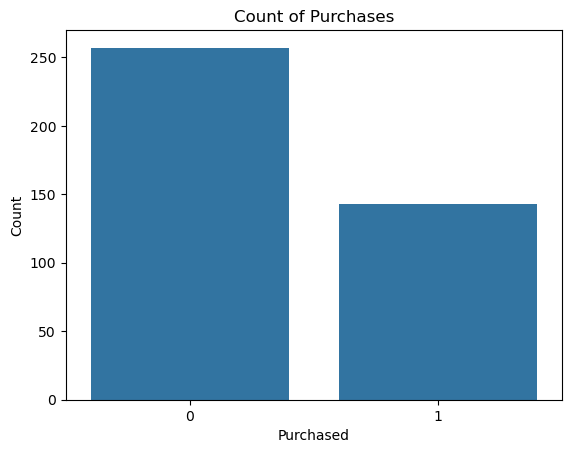

In [20]:
sns.countplot(x='Purchased', data=dataset)
plt.title('Count of Purchases')
plt.xlabel('Purchased')
plt.ylabel('Count')
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
X_train

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000],
       [    42,  80000],
       [    40,  75000],
       [    59, 130000],
       [    46,  41000],
       [    41,  60000],
       [    42,  64000],
       [    37, 146000],
       [    23,  48000],
       [    25,  33000],
       [    24,  84000],
       [    27,  96000],
       [    23,  63000],
       [    48,  33000],
       [    48,  90000],
       [    42, 104000],
       [    44,  39000],
       [    32, 120000],
       [    38,  50000],
       [    32, 135000],
       [    52,  21000],
       [    53, 104000],
       [    39,  42000],
       [    38,  61000],
       [    36,  50000],
       [    36,  63000],
       [    35,  25000],
       [    35,  50000],
       [    42,  73000],
       [    47,  49000],
       [    59,  29000],
       [    49,  65000],
       [    45, 131000],
       [    31,  89000],
       [    46,  82000],
       [    47,  51000],


In [23]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train

array([[ 1.92295008e+00,  2.14601566e+00],
       [ 2.02016082e+00,  3.78719297e-01],
       [-1.38221530e+00, -4.32498705e-01],
       [-1.18779381e+00, -1.01194013e+00],
       [ 1.92295008e+00, -9.25023920e-01],
       [ 3.67578135e-01,  2.91803083e-01],
       [ 1.73156642e-01,  1.46942725e-01],
       [ 2.02016082e+00,  1.74040666e+00],
       [ 7.56421121e-01, -8.38107706e-01],
       [ 2.70367388e-01, -2.87638347e-01],
       [ 3.67578135e-01, -1.71750061e-01],
       [-1.18475597e-01,  2.20395980e+00],
       [-1.47942605e+00, -6.35303205e-01],
       [-1.28500455e+00, -1.06988428e+00],
       [-1.38221530e+00,  4.07691369e-01],
       [-1.09058306e+00,  7.55356227e-01],
       [-1.47942605e+00, -2.00722133e-01],
       [ 9.50842613e-01, -1.06988428e+00],
       [ 9.50842613e-01,  5.81523798e-01],
       [ 3.67578135e-01,  9.87132798e-01],
       [ 5.61999628e-01, -8.96051849e-01],
       [-6.04529329e-01,  1.45068594e+00],
       [-2.12648508e-02, -5.77359062e-01],
       [-6.

In [25]:
class KNN():
    def __init__(self, k):
        self.k = k
        print("K =", self.k)

    def fit(self, X_train, y_train):
        self.x_train = X_train
        self.y_train = y_train

    def calculate_euclidean(self, sample1, sample2):
        distance = 0.0
        for i in range(len(sample1)):
            distance += (sample1[i] - sample2[i]) ** 2
        return sqrt(distance)

    def nearest_neighbors(self, test_sample):
        distances = []
        for i in range(len(self.x_train)):
            distances.append((self.y_train[i], self.calculate_euclidean(self.x_train[i], test_sample)))
        distances.sort(key=lambda x: x[1])
        neighbors = []
        for i in range(self.k):
            neighbors.append(distances[i][0])
        return neighbors

    def predict(self, test_set):
        predictions = []
        for test_sample in test_set:
            neighbors = self.nearest_neighbors(test_sample)
            labels = [sample for sample in neighbors]
            prediction = max(labels, key=labels.count)
            predictions.append(prediction)
        return predictions

In [26]:
model = KNN(k=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

K = 5


In [27]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy Score:", acc)

Confusion Matrix:
 [[55  3]
 [ 1 21]]
Accuracy Score: 0.95


In [28]:
def plot_knn_decision_boundary(X_set, y_set, title, model, step=0.1):
    from matplotlib.colors import ListedColormap
    import matplotlib.pyplot as plt
    import numpy as np

    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=step),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=step)
    )

    # Flatten meshgrid and stack for batch processing
    grid_points = np.c_[X1.ravel(), X2.ravel()]
    
    # Batch prediction with progress
    print(f"Predicting {len(grid_points)} points for decision boundary...")
    Z = []
    for point in grid_points:
        Z.append(model.predict([point])[0])
    Z = np.array(Z).reshape(X1.shape)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.scatter(X_set[y_set == 0, 0], X_set[y_set == 0, 1], c='red', label='Not Purchased')
    plt.scatter(X_set[y_set == 1, 0], X_set[y_set == 1, 1], c='green', label='Purchased')
    plt.title(title)
    plt.xlabel('Age (scaled)')
    plt.ylabel('Estimated Salary (scaled)')
    plt.legend()
    plt.show()


Predicting 3660 points for decision boundary...


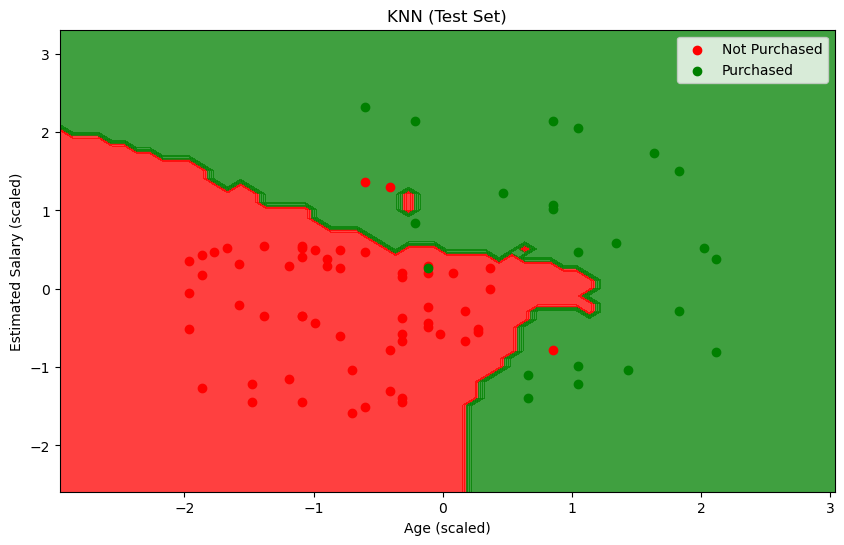

In [29]:

plot_knn_decision_boundary(X_test, y_test, 'KNN (Test Set)', model, step=0.1)
